#### A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.


#### From the problem statement we came to know that this is a Classification problem. we need to predict whether a person is alive or not after 1 year using the given data set.
#### Dataset used: https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv

In [2]:
##### Author: Aarthi Kalyanasundaram
##### Date: 4-Jul-2020
##### Project: Prediction of survival of patients after 1 year

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [2]:
#df :: name of the dataframe

df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv")

## Analyzing the shape of the dataset

In [3]:
df.shape

(23097, 18)

In [4]:
#Analyzing the data

df.head(10)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
7,17265,9,5947,DX5,3,18.126976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
8,24349,47,6585,DX4,62,25.074482,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
9,1647,17,10190,DX6,46,17.663877,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [5]:
#Verifying whether null is there in the dataset or not

df.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [6]:
#Removal of null elements

df.dropna(subset = ["Treated_with_drugs","A","B","C","D","E","F","Z"], inplace = True)

In [7]:
#verifying whether null is present or not

df.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [8]:
df.Number_of_prev_cond.isnull().sum()

0

In [9]:
df.Patient_mental_condition.isnull().sum()

0

In [10]:
df.Patient_Rural_Urban.isnull().sum()

0

In [11]:
df.Patient_Smoker.isnull().sum()

0

In [12]:
df.Patient_Body_Mass_Index.isnull().sum()

0

In [13]:
#After removal of null, checking the size of dataframe

df.shape

(21849, 18)

In [48]:
#Assigning values for X and Y

y = df["Survived_1_year"]
X = df.drop(["Survived_1_year"], axis = 1)

In [49]:
X.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond'],
      dtype='object')

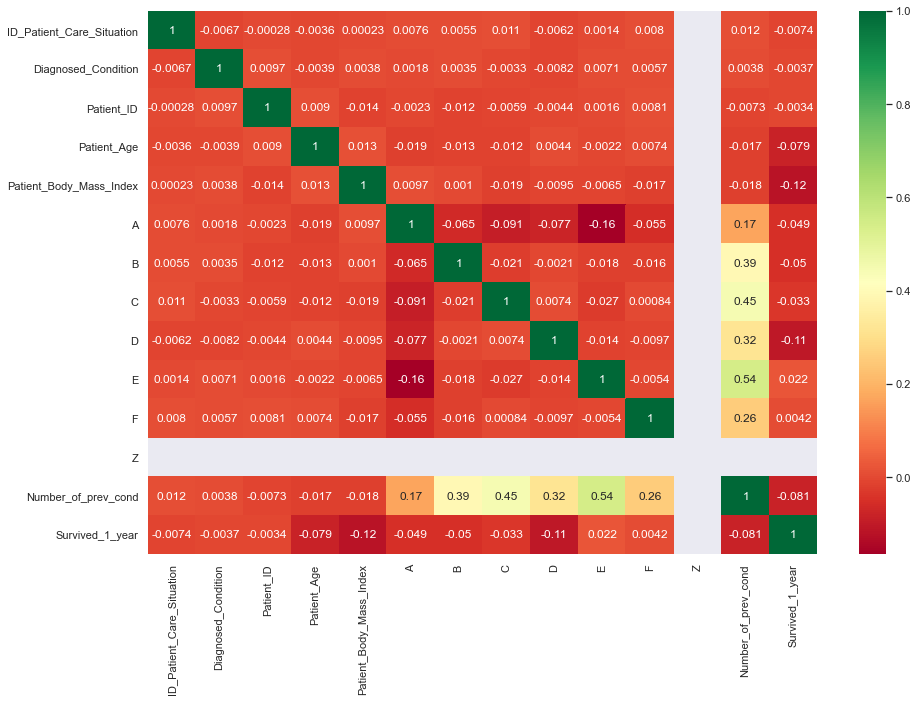

In [50]:
Correlation = df.corr()
sns.heatmap(Correlation, annot = True, cmap = "RdYlGn")
sns.set(rc={'figure.figsize':(15,10)})
plt.show()

## Exploratory Data Analysis

In [51]:
#Analyzing the column Patient_Smoker

X.Patient_Smoker.value_counts()

NO     12519
YES     9330
Name: Patient_Smoker, dtype: int64

In [52]:
def convertToCategories(values):
    if values == "NO" :
        return 0;
    if values == "YES" :
        return 1;
  
X['Patient_Smoker'] = X['Patient_Smoker'].apply(convertToCategories)

In [53]:
#Analyzing the column Patient_Smoker after converting to integers

X.Patient_Smoker.value_counts()

0    12519
1     9330
Name: Patient_Smoker, dtype: int64

In [54]:
X.Patient_Rural_Urban.value_counts()

RURAL    15279
URBAN     6570
Name: Patient_Rural_Urban, dtype: int64

In [55]:
#Treated with Drugs column need to be splitted

X.Treated_with_drugs.value_counts()

DX6                     8148
DX5                     1812
DX2                     1802
DX1                     1747
DX3                     1741
DX4                     1697
DX3 DX4                  426
DX1 DX2                  422
DX4 DX5                  402
DX1 DX3                  397
DX2 DX4                  394
DX1 DX4                  385
DX1 DX5                  381
DX3 DX5                  378
DX2 DX3                  377
DX2 DX5                  371
DX1 DX2 DX5               98
DX1 DX3 DX5               95
DX1 DX2 DX4               93
DX2 DX3 DX5               89
DX3 DX4 DX5               88
DX1 DX2 DX3               86
DX1 DX3 DX4               85
DX2 DX3 DX4               82
DX2 DX4 DX5               78
DX1 DX4 DX5               72
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           23
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           17
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [56]:
#Performing One hot encoding

a = pd.get_dummies(X.Treated_with_drugs, prefix='Drugs')

In [57]:
X = X.drop('Treated_with_drugs',axis = 1)

In [58]:
X = X.join(a)

In [59]:
X

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,Drugs_DX2 DX4 DX5,Drugs_DX2 DX5,Drugs_DX3,Drugs_DX3 DX4,Drugs_DX3 DX4 DX5,Drugs_DX3 DX5,Drugs_DX4,Drugs_DX4 DX5,Drugs_DX5,Drugs_DX6
0,22374,8,3333,56,18.479385,1,URBAN,Stable,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,18164,5,5740,36,22.945566,1,RURAL,Stable,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,6283,23,10446,48,27.510027,1,RURAL,Stable,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,5339,51,12011,5,19.130976,0,URBAN,Stable,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,10808,45,7977,47,26.155120,1,URBAN,Stable,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,14,18.643448,0,RURAL,Stable,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
23093,15503,41,2769,55,23.684585,0,RURAL,Stable,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
23094,2167,24,7671,63,27.500039,1,RURAL,Stable,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
23095,31646,11,5764,25,23.719125,1,RURAL,Stable,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [60]:
X.isnull().sum()

ID_Patient_Care_Situation     0
Diagnosed_Condition           0
Patient_ID                    0
Patient_Age                   0
Patient_Body_Mass_Index       0
Patient_Smoker                0
Patient_Rural_Urban           0
Patient_mental_condition      0
A                             0
B                             0
C                             0
D                             0
E                             0
F                             0
Z                             0
Number_of_prev_cond           0
Drugs_DX1                     0
Drugs_DX1 DX2                 0
Drugs_DX1 DX2 DX3             0
Drugs_DX1 DX2 DX3 DX4         0
Drugs_DX1 DX2 DX3 DX4 DX5     0
Drugs_DX1 DX2 DX3 DX5         0
Drugs_DX1 DX2 DX4             0
Drugs_DX1 DX2 DX4 DX5         0
Drugs_DX1 DX2 DX5             0
Drugs_DX1 DX3                 0
Drugs_DX1 DX3 DX4             0
Drugs_DX1 DX3 DX4 DX5         0
Drugs_DX1 DX3 DX5             0
Drugs_DX1 DX4                 0
Drugs_DX1 DX4 DX5             0
Drugs_DX

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
result = logreg.fit(X_train,y_train)

In [63]:
b = pd.get_dummies(X.Patient_mental_condition, prefix='Mental_Condition')

In [64]:
X = X.drop('Patient_mental_condition',axis = 1)

In [65]:
X = X.join(b)

In [66]:
X

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,...,Drugs_DX2 DX5,Drugs_DX3,Drugs_DX3 DX4,Drugs_DX3 DX4 DX5,Drugs_DX3 DX5,Drugs_DX4,Drugs_DX4 DX5,Drugs_DX5,Drugs_DX6,Mental_Condition_Stable
0,22374,8,3333,56,18.479385,1,URBAN,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
1,18164,5,5740,36,22.945566,1,RURAL,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,6283,23,10446,48,27.510027,1,RURAL,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
3,5339,51,12011,5,19.130976,0,URBAN,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,10808,45,7977,47,26.155120,1,URBAN,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,14,18.643448,0,RURAL,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
23093,15503,41,2769,55,23.684585,0,RURAL,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
23094,2167,24,7671,63,27.500039,1,RURAL,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
23095,31646,11,5764,25,23.719125,1,RURAL,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [69]:
c = pd.get_dummies(X.Patient_Rural_Urban, prefix = "Cityside")

In [71]:
X = X.drop("Patient_Rural_Urban", axis = 1)

In [72]:
X = X.join(c)

In [75]:
y_pred = logreg.predict(X_train)

In [76]:
y_pred_new = logreg.predict(X_test)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_new))

             precision    recall  f1-score   support

          0       0.67      0.46      0.55      2464
          1       0.73      0.87      0.79      4091

avg / total       0.71      0.71      0.70      6555



In [79]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_new)
print('F1 score: %f' % f1)

F1 score: 0.790885


In [80]:
res = pd.DataFrame(y_pred_new) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = X_test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("C:/Users/aarthiksundaram/Downloads/prediction_results.csv") 

In [81]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= logreg , step = 1) 

fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 24
Selected Features: [False False False False False  True False False False  True  True  True
 False  True False False False False  True  True False False  True  True
  True False  True False  True  True False False False  True  True False
  True  True False False  True  True False  True  True  True  True  True
 False]
Feature Ranking: [25 23 24 22 17  1  2  8 19  1  1  1 26  1 18  5  3 20  1  1 13  9  1  1
  1 16  1 12  1  1  7 21 11  1  1  4  1  1 14 15  1  1  6  1  1  1  1  1
 10]


In [82]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
24,Drugs_DX1 DX3 DX4,1
29,Drugs_DX1 DX5,1
28,Drugs_DX1 DX4 DX5,1
34,Drugs_DX2 DX3 DX5,1
26,Drugs_DX1 DX3 DX5,1
47,Cityside_RURAL,1
23,Drugs_DX1 DX3,1
22,Drugs_DX1 DX2 DX5,1
36,Drugs_DX2 DX4 DX5,1
19,Drugs_DX1 DX2 DX3 DX5,1


## Create a new subset of the data with only the selected features

In [83]:
# Transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fitting our baseline model with the transformed data
logreg_rfe_model = logreg.fit(X_train_rfe, y_train)

In [84]:
y_pred_rfe = logreg.predict(X_train_rfe)

In [86]:
y_pred_new_rfe = logreg.predict(X_test_rfe)

In [87]:
print(classification_report(y_test, y_pred_new_rfe))

             precision    recall  f1-score   support

          0       0.69      0.49      0.58      2464
          1       0.74      0.87      0.80      4091

avg / total       0.72      0.73      0.71      6555



In [88]:
f1score = f1_score(y_test, y_pred_new_rfe)
print('F1 score: %f' % f1score)

F1 score: 0.798650


In [90]:
res_after_optimization = pd.DataFrame(y_pred_new_rfe) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res_after_optimization.index = X_test.index # its important for comparison. Here "test_new" is your new test dataset
res_after_optimization.columns = ["predictions"]
res_after_optimization.to_csv("C:/Users/aarthiksundaram/Downloads/prediction_results_after_Optimization.csv") 

AttributeError: 'numpy.ndarray' object has no attribute 'index'

C:\Users\aarthiksundaram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


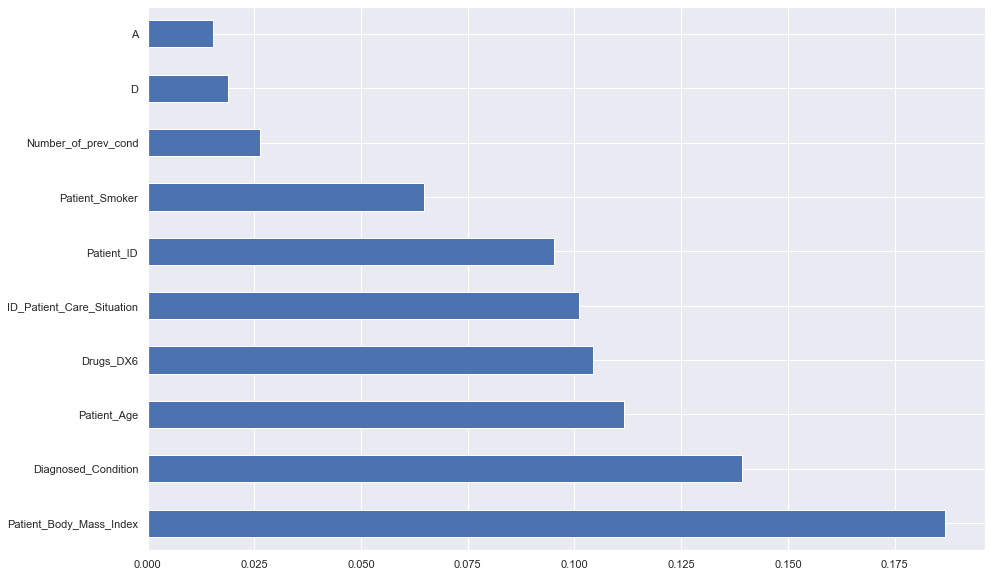

In [91]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)

# n_estimators = The number of trees in the forest.
# n_jobs = -1 : Use all processors for training

# Train the classifier
rf_clf.fit(X_train, y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [92]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# It will select the features based on the importance score
rf_sfm = SelectFromModel(rf_clf)

#Alternatively if you want to set a specific threshold and select the features you may the following code that is commented
# features that have an importance of more than 0.13 ( all top 4 features lie above this)
# rf_sfm = SelectFromModel(rf_clf, threshold=0.13)

# Train the selector
rf_sfm = rf_sfm.fit(X_train, y_train)

In [93]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = rf_sfm.transform(X_train)
X_important_test = rf_sfm.transform(X_test)

In [94]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important = clf_important.fit(X_important_train, y_train)

In [95]:
y_important_pred = clf_important.predict(X_important_test)

In [96]:
print(classification_report(y_test, y_important_pred))

             precision    recall  f1-score   support

          0       0.73      0.67      0.70      2464
          1       0.81      0.85      0.83      4091

avg / total       0.78      0.79      0.78      6555



In [97]:
f1score = f1_score(y_test, y_important_pred)
print('F1 score: %f' % f1score)

F1 score: 0.832141


In [98]:
res_after_optimization = pd.DataFrame(y_important_pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res_after_optimization.index = X_test.index # its important for comparison. Here "test_new" is your new test dataset
res_after_optimization.columns = ["predictions"]
res_after_optimization.to_csv("C:/Users/aarthiksundaram/Downloads/prediction_results_after_Optimization.csv")